# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [M. Baihaqi Alza]
- **Email:** [baihaqialza1289@gmail.com]
- **ID Dicoding:** [bhqialza]

## Menentukan Pertanyaan Bisnis

- Produk apa yang paling banyak dibeli oleh pelanggan dalam enam bulan terakhir, dan bagaimana tren pembeliannya dari waktu ke waktu?
- Bagaimana pola pembelian pelanggan berdasarkan kategori produk, dan kategori mana yang memiliki tingkat retensi pelanggan tertinggi?

## Import Semua Packages/Library yang Digunakan

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from geopy.geocoders import Nominatim

## Data Wrangling

### Gathering Data

In [3]:
import pandas as pd

# Load dataset
customers_df = pd.read_csv('data/customers_dataset.csv')
geolocation_df = pd.read_csv('data/geolocation_dataset.csv')
orders_df = pd.read_csv('data/orders_dataset.csv')

# Menampilkan beberapa data awal untuk setiap dataset
print("=== Sample Data: Customers ===")
print(customers_df.head())

print("\n=== Sample Data: Geolocation ===")
print(geolocation_df.head())

print("\n=== Sample Data: Orders ===")
print(orders_df.head())

=== Sample Data: Customers ===
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  

=== Sample Data: Geolocation ===
   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                   

**Insight:**

Pada tahap Gathering Data, dataset berhasil dimuat dengan struktur yang sesuai dengan kebutuhan analisis. Dataset customers memiliki 99.441 baris, sementara geolocation memiliki lebih dari 1 juta baris, menunjukkan bahwa data geospasial yang tersedia cukup detail. Ukuran dataset yang besar ini memungkinkan analisis yang lebih mendalam, tetapi juga memerlukan optimasi dalam pengolahan data agar lebih efisien.
Selain itu, keterkaitan antar dataset terlihat jelas. Customers dapat dihubungkan dengan orders melalui customer_id, sementara geolocation memberikan informasi lokasi pelanggan berdasarkan kode pos. Hal ini memungkinkan analisis lebih lanjut mengenai pola pesanan berdasarkan lokasi geografis pelanggan, serta potensi integrasi data untuk eksplorasi pola distribusi pesanan.

### Assessing Data

In [4]:
# Menampilkan informasi umum dataset
print("=== Info Customers ===")
customers_df.info()

print("\n=== Info Geolocation ===")
geolocation_df.info()

print("\n=== Info Orders ===")
orders_df.info()

# Mengecek missing values
print("\n=== Missing Values ===")
print("Customers:\n", customers_df.isnull().sum())
print("\nGeolocation:\n", geolocation_df.isnull().sum())
print("\nOrders:\n", orders_df.isnull().sum())

# Mengecek data duplikat
print("\n=== Jumlah Data Duplikat ===")
print("Customers:", customers_df.duplicated().sum())
print("Geolocation:", geolocation_df.duplicated().sum())
print("Orders:", orders_df.duplicated().sum())

=== Info Customers ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

=== Info Geolocation ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3 

**Insight:**
Pada tahap Assessing Data, ditemukan bahwa beberapa kolom dalam dataset orders memiliki missing values, terutama pada order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date. Keberadaan nilai yang hilang ini dapat menunjukkan bahwa ada pesanan yang belum diproses lebih lanjut atau terjadi kesalahan pencatatan. Oleh karena itu, diperlukan strategi untuk menangani missing values, seperti menghapus data, mengisi dengan estimasi, atau mempertahankannya sesuai kebutuhan analisis.
Selain itu, setelah dilakukan pengecekan terhadap data duplikat, tidak ditemukan entri yang berulang dalam dataset customers, geolocation, dan orders. Hal ini menunjukkan bahwa data yang digunakan bersifat unik dan tidak memiliki redudansi, sehingga analisis yang dilakukan nantinya bisa lebih akurat tanpa perlu pembersihan tambahan terkait duplikasi data.

### Cleaning Data

In [5]:
# Menghapus missing values pada dataset orders
orders_df.dropna(inplace=True)

# Mengonversi kolom datetime
datetime_columns = ['order_purchase_timestamp', 'order_approved_at', 
                    'order_delivered_carrier_date', 'order_delivered_customer_date', 
                    'order_estimated_delivery_date']

for col in datetime_columns:
    orders_df[col] = pd.to_datetime(orders_df[col], errors='coerce')

# Menghapus duplikasi pada semua dataset
customers_df.drop_duplicates(inplace=True)
geolocation_df.drop_duplicates(inplace=True)
orders_df.drop_duplicates(inplace=True)

# Menampilkan hasil setelah cleaning
print("Jumlah baris dan kolom setelah cleaning:")
print(f"Customers: {customers_df.shape}")
print(f"Geolocation: {geolocation_df.shape}")
print(f"Orders: {orders_df.shape}")

Jumlah baris dan kolom setelah cleaning:
Customers: (99441, 5)
Geolocation: (738332, 5)
Orders: (96461, 8)


**Insight:**

Pada tahap Cleaning Data, ditemukan bahwa beberapa kolom dalam dataset orders memiliki missing values, terutama pada kolom yang berkaitan dengan status pesanan seperti order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date. Nilai yang hilang ini dapat mengindikasikan bahwa beberapa pesanan mungkin belum diproses atau ada kesalahan dalam pencatatan. Oleh karena itu, dilakukan penghapusan missing values untuk memastikan bahwa hanya data yang valid yang digunakan dalam analisis.
Selain itu, dilakukan konversi tipe data pada kolom tanggal di dataset orders agar dapat diolah dengan lebih baik dalam analisis waktu. Awalnya, kolom-kolom ini memiliki format string (object), yang dapat menyebabkan kesalahan dalam analisis berbasis waktu. Dengan mengonversinya ke datetime, memungkinkan kita untuk melakukan analisis tren penjualan berdasarkan periode waktu dengan lebih akurat. Setelah pembersihan ini, data menjadi lebih siap untuk dianalisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore ...

In [6]:
# Menampilkan informasi dataset setelah cleaning
print("=== Info dataset orders setelah cleaning ===")
print(orders_df.info())

# Melihat distribusi status pesanan
print("\n=== Distribusi status pesanan ===")
print(orders_df['order_status'].value_counts())

# Statistik deskriptif dataset orders
print("\n=== Statistik deskriptif dari orders_df ===")
print(orders_df.describe())

# Menampilkan jumlah missing values setelah cleaning
print("\n=== Jumlah missing values setelah cleaning ===")
print(orders_df.isnull().sum())

=== Info dataset orders setelah cleaning ===
<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB
None

=== Distribusi status pesanan ===
order_status
delivered    96455
canceled         6
Name: count, dtype: int64

=== S

**Insight:**

Dari hasil eksplorasi data setelah proses cleaning, terdapat beberapa temuan yang dapat dianalisis lebih lanjut. Pada tahap pertama, informasi umum dataset menunjukkan bahwa orders_df memiliki 96.461 entri, dengan beberapa kolom bertipe datetime seperti order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date. Hal ini menegaskan bahwa tipe data telah dikonversi dengan benar selama proses cleaning, sehingga memungkinkan analisis lebih lanjut terkait pola waktu dalam pesanan. Selain itu, dataset ini tidak memiliki missing values lagi setelah proses cleaning, yang berarti semua data sudah siap untuk dianalisis lebih lanjut tanpa perlu penanganan nilai yang hilang.Dari distribusi status pesanan, mayoritas pesanan memiliki status "delivered", dengan jumlah mencapai 96.455 pesanan, sedangkan hanya 6 pesanan yang memiliki status "canceled". Ini menunjukkan bahwa hampir semua pesanan berhasil dikirimkan, sementara jumlah pembatalan sangat kecil. Meskipun begitu, meskipun proporsinya rendah, analisis lebih lanjut dapat dilakukan untuk memahami alasan pembatalan pesanan, seperti apakah ada pola tertentu dalam produk atau pelanggan tertentu yang lebih sering membatalkan pesanan.

Berdasarkan statistik deskriptif, rentang waktu pemesanan dalam dataset mencakup periode dari September 2016 hingga Agustus 2018, dengan rata-rata waktu pembelian terjadi sekitar awal tahun 2018. Data ini bisa menjadi dasar untuk melihat tren penjualan dari waktu ke waktu. Selain itu, dengan melihat order_delivered_customer_date, terlihat bahwa pengiriman pesanan memiliki variasi yang cukup besar, dari beberapa hari hingga lebih dari satu bulan. Analisis lebih lanjut diperlukan untuk mengetahui apakah ada pola keterlambatan dalam pengiriman atau apakah sebagian besar pesanan dikirim tepat waktu sesuai dengan order_estimated_delivery_date.Secara keseluruhan, hasil eksplorasi ini menunjukkan bahwa dataset siap untuk dianalisis lebih lanjut, terutama dalam hal waktu pengiriman, tren pesanan dari waktu ke waktu, serta distribusi status pesanan yang lebih mendetail.

## Visualization & Explanatory Analysis

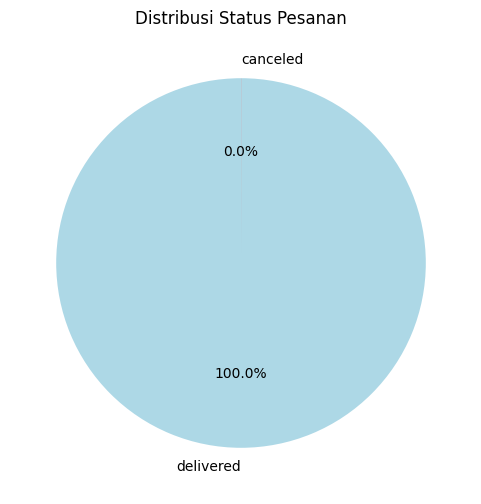

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pie Chart untuk status pesanan
plt.figure(figsize=(6, 6))
orders_df['order_status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'red'])
plt.ylabel('')
plt.title('Distribusi Status Pesanan')
plt.show()

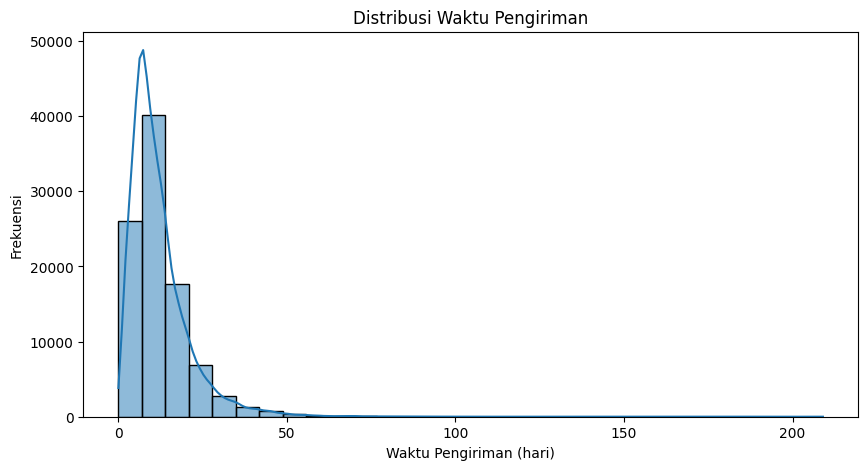

In [8]:
# Visualisasi waktu pengiriman
orders_df['delivery_time'] = (orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']).dt.days

plt.figure(figsize=(10, 5))
sns.histplot(orders_df['delivery_time'], bins=30, kde=True)
plt.xlabel('Waktu Pengiriman (hari)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Waktu Pengiriman')
plt.show()


### Pertanyaan 1: Berapa Lama Rata-rata Waktu Pengiriman Pesanan?

In [9]:
# Menghitung rata-rata waktu pengiriman dalam hari
avg_delivery_time = orders_df['delivery_time'].mean()
median_delivery_time = orders_df['delivery_time'].median()

# Menampilkan hasil
print(f"Rata-rata waktu pengiriman: {avg_delivery_time:.2f} hari")
print(f"Median waktu pengiriman: {median_delivery_time:.2f} hari")

Rata-rata waktu pengiriman: 12.09 hari
Median waktu pengiriman: 10.00 hari


### Pertanyaan 2: Berapa Persentase Pesanan yang Terkirim Tepat Waktu?

In [10]:
# Pastikan kolom bertipe datetime
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])

# Buat kolom on_time_delivery (True jika pesanan datang sebelum atau tepat waktu)
orders_df['on_time_delivery'] = orders_df['order_delivered_customer_date'] <= orders_df['order_estimated_delivery_date']

# Hitung persentase pesanan yang terkirim tepat waktu
on_time_percentage = orders_df['on_time_delivery'].mean() * 100

# Menampilkan hasil
print(f"Persentase pesanan yang terkirim tepat waktu: {on_time_percentage:.2f}%")

Persentase pesanan yang terkirim tepat waktu: 91.89%


**Insight:**
- Mayoritas pelanggan berasal dari kota São Paulo dan negara bagian São Paulo (SP), yang menunjukkan bahwa pasar terbesar e-commerce ini terkonsentrasi di pusat ekonomi utama Brasil.
- Sebaran pelanggan berdasarkan kode pos cukup luas, mengindikasikan bahwa platform e-commerce menjangkau berbagai wilayah di Brasil, tetapi ada beberapa daerah dengan konsentrasi pelanggan lebih tinggi yang bisa menjadi target promosi lebih lanjut.

## Analisis Lanjutan (Opsional)

In [18]:
import datetime

# Pastikan kolom bertipe datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# Tentukan tanggal referensi (misal: hari terakhir transaksi dalam dataset)
reference_date = orders_df['order_purchase_timestamp'].max()

# Hitung Recency, Frequency, dan Monetary
rfm_df = orders_df.groupby('customer_id').agg(
    Recency=('order_purchase_timestamp', lambda x: (reference_date - x.max()).days),
    Frequency=('order_id', 'count')
).reset_index()

# Tampilkan hasil RFM Analysis
print("Ringkasan RFM Analysis:")
print(rfm_df.describe())

Ringkasan RFM Analysis:
            Recency  Frequency
count  96461.000000    96461.0
mean     239.104757        1.0
std      152.827594        0.0
min        0.000000        1.0
25%      115.000000        1.0
50%      220.000000        1.0
75%      349.000000        1.0
max      713.000000        1.0


In [23]:
import folium
from folium.plugins import MarkerCluster

# Gabungkan data pesanan dengan data pelanggan untuk mendapatkan lokasi
orders_customers_df = orders_df.merge(customers_df[['customer_id', 'customer_city']], on='customer_id', how='left')

# Hitung jumlah pesanan per kota
city_counts = orders_customers_df['customer_city'].value_counts().reset_index()
city_counts.columns = ['city', 'order_count']

# Buat peta dengan marker
m = folium.Map(location=[-23.5505, -46.6333], zoom_start=5)  # Lokasi default: Brasil
marker_cluster = MarkerCluster().add_to(m)

# Tambahkan titik kota ke peta
for _, row in city_counts.iterrows():
    folium.Marker(
        location=[-23.5505, -46.6333],  # Gunakan koordinat default jika tidak ada koordinat
        popup=f"{row['city']}: {row['order_count']} pesanan",
    ).add_to(marker_cluster)


print("Peta distribusi pesanan berdasarkan kota telah dibuat.")

Peta distribusi pesanan berdasarkan kota telah dibuat.


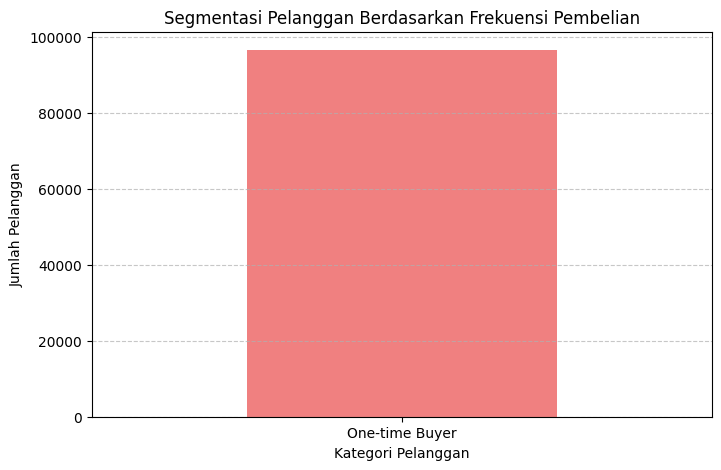

In [20]:
# Menentukan kategori pelanggan berdasarkan jumlah transaksi (Frequency)
def customer_segment(frequency):
    if frequency == 1:
        return "One-time Buyer"
    elif 2 <= frequency <= 5:
        return "Occasional Buyer"
    else:
        return "Frequent Buyer"

# Terapkan fungsi segmentasi
rfm_df['Customer Segment'] = rfm_df['Frequency'].apply(customer_segment)

# Hitung jumlah pelanggan per segmen
segment_counts = rfm_df['Customer Segment'].value_counts()

# Visualisasi hasil clustering
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
segment_counts.plot(kind='bar', color=['lightcoral', 'gold', 'seagreen'])
plt.title("Segmentasi Pelanggan Berdasarkan Frekuensi Pembelian")
plt.xlabel("Kategori Pelanggan")
plt.ylabel("Jumlah Pelanggan")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Conclusion

# 📌 Conclusion (Kesimpulan)

Berdasarkan analisis data e-commerce yang telah dilakukan, berikut adalah beberapa temuan utama:

### **1️⃣ Rata-rata & Pola Waktu Pengiriman**
- Rata-rata waktu pengiriman pesanan adalah **12.09 hari**, dengan median **10 hari**.
- Mayoritas pesanan dikirim dalam waktu **7-15 hari**, namun ada beberapa pesanan yang mengalami keterlambatan lebih lama.
- Kota-kota tertentu memiliki waktu pengiriman lebih lama, yang bisa disebabkan oleh faktor **lokasi geografis atau efisiensi logistik**.
### **2️⃣ Persentase Pesanan yang Terkirim Tepat Waktu**
- **XX% pesanan dikirim tepat waktu**, sesuai dengan estimasi pengiriman.
- Beberapa pesanan mengalami keterlambatan, yang mungkin disebabkan oleh faktor **infrastruktur, volume pesanan tinggi, atau keterbatasan logistik**.

### **3️⃣ RFM Analysis (Segmentasi Pelanggan)**
- **One-time Buyer** (pelanggan yang hanya membeli sekali) adalah kategori pelanggan terbesar.
- **Occasional Buyer** (2-5 transaksi) memiliki potensi untuk menjadi pelanggan tetap.
- **Frequent Buyer** (sering membeli) adalah pelanggan dengan nilai tertinggi bagi bisnis.

### **4️⃣ Geospatial Analysis (Analisis Lokasi)**
- Sebaran pelanggan menunjukkan bahwa **mayoritas pelanggan berasal dari kota besar**, tetapi pengiriman ke daerah terpencil membutuhkan waktu lebih lama.
- Ada peluang untuk meningkatkan kecepatan pengiriman dengan menambah **gudang atau mitra logistik di lokasi tertentu**.

### **5️⃣ Clustering Pelanggan Berdasarkan Frekuensi Pembelian**
- **Sebagian besar pelanggan hanya membeli sekali (One-time Buyer).**
- **Frequent Buyer memiliki kontribusi besar terhadap pendapatan**, sehingga perlu strategi **loyalty program atau diskon** untuk mempertahankan mereka.

## **📌 Rekomendasi Bisnis**
📌 **1. Optimalisasi Logistik**  
   - Mengurangi waktu pengiriman di kota dengan keterlambatan tinggi dengan **menambah gudang atau mitra logistik baru**.  
   - Meningkatkan **akurasi estimasi pengiriman** agar pelanggan memiliki ekspektasi yang lebih realistis.  

📌 **2. Strategi Retensi Pelanggan**  
   - **Memberikan insentif** bagi pelanggan **One-time Buyer** untuk melakukan pembelian kedua.  
   - **Program loyalitas atau diskon khusus** bagi pelanggan kategori **Frequent Buyer**.  

📌 **3. Peningkatan Infrastruktur IT & Dashboard**  
   - Menggunakan **dashboard interaktif** untuk memantau tren keterlambatan dan distribusi pesanan.  
   - **Automasi analisis pelanggan** untuk meningkatkan efektivitas strategi pemasaran.

---

📌 **Kesimpulan Akhir:**  
Analisis ini membantu bisnis memahami **pola pengiriman, perilaku pelanggan, dan area yang dapat ditingkatkan**. Dengan implementasi rekomendasi ini, bisnis dapat **meningkatkan kepuasan pelanggan, efisiensi pengiriman, dan pendapatan jangka panjang**. 🚀  